# Is Daylight Saving Time a Killer?
Let's take a look at the accidents for CA and AZ in the years 2016-2021! 


Gerardo Angulo, Tim Gannaway, Nikki Ryan, Rebecca Watson, Yuntian Xue

In [48]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

The data frame below is pulled from our "california_cleaned_df" notebook. 
This notebook contains data from 2016-2021. 

In [49]:
# Read the california sample csv and store in data frame
ca_df = pd.read_csv('california_sample.csv')
ca_df.head()

,Unnamed: 0,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,City,County,State,...,No_Exit,Station,Stop,Traffic_Signal,Sunrise_Sunset,date,time,year,month,day
0,1901925,A-1901926,2,2020-11-17 17:12:00,39.930742,-123.763228,Incident on US-101 NB near HOUSE 10069 Expect ...,Piercy,Mendocino,CA,...,False,False,False,False,Night,2020-11-17,17:12:00,2020,11,17
1,351751,A-351752,2,2021-03-26 13:56:24,34.021157,-118.477548,Stationary traffic on I-10 W - Santa Monica Fw...,Santa Monica,Los Angeles,CA,...,False,False,False,False,Day,2021-03-26,13:56:24,2021,3,26
2,1991543,A-1991544,2,2020-10-29 12:15:30,34.199362,-118.396519,Stationary traffic from Vose St to CA-170 N du...,North Hollywood,Los Angeles,CA,...,False,False,False,False,Day,2020-10-29,12:15:30,2020,10,29
3,1744181,A-1744182,2,2020-11-06 18:15:30,36.684873,-119.749592,Slow traffic on CA-99 from Central Ave (CA-99)...,Fresno,Fresno,CA,...,False,False,False,False,Night,2020-11-06,18:15:30,2020,11,6
4,1612021,A-1612022,2,2021-02-27 11:21:00,39.796584,-123.266931,Accident from Tabor Ln to Tabor Ln / Pomo Trl.,Covelo,Mendocino,CA,...,False,False,False,False,Day,2021-02-27,11:21:00,2021,2,27


We created buckets in the notebook titled "DST_CA_buckets". 
The four buckets we used are: DST_on_PRE (spring), DST_on_POST (spring), DST_off_PRE (fall), DST_off_POST (fall).

In [50]:
# Read the dst file that contains the exact day light saving time date and categories, 
# and store in a data frame
dst_df = pd.read_csv('DST_CA_buckets.csv')
dst_df.head()

,GroupName,State,tz,DST_Flag,Change_YR,Change_Mo,Change_Day,Change_DT
0,CA_DST_on,CA,Pacific,DST_on_PRE,2015,2,26,2/26/2015
1,CA_DST_on,CA,Pacific,DST_on_PRE,2015,2,27,2/27/2015
2,CA_DST_on,CA,Pacific,DST_on_PRE,2015,2,28,2/28/2015
3,CA_DST_on,CA,Pacific,DST_on_PRE,2015,3,1,3/1/2015
4,CA_DST_on,CA,Pacific,DST_on_PRE,2015,3,2,3/2/2015


We then prepared our dataframes for merge by matching the column headers for the California data and the buckets.  

In [51]:
# change the column names of dst_ca_df to match with ca_df
dst_df.rename(columns= {'Change_Mo': 'month', 'Change_YR': 'year', 'Change_Day': 'day'}, inplace = True)

# get rid of the columns in dst_ca_df unnecessary for merging
dst_cleaned = dst_df[['DST_Flag', 'year', 'month', 'day']]

In [52]:
merge_ca_df = ca_df.merge(dst_cleaned, how = 'inner', on = ['year', 'month', 'day'])
merge_ca_df.head()

,Unnamed: 0,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,City,County,State,...,Station,Stop,Traffic_Signal,Sunrise_Sunset,date,time,year,month,day,DST_Flag
0,1991543,A-1991544,2,2020-10-29 12:15:30,34.199362,-118.396519,Stationary traffic from Vose St to CA-170 N du...,North Hollywood,Los Angeles,CA,...,False,False,False,Day,2020-10-29,12:15:30,2020,10,29,DST_off_PRE
1,1993694,A-1993695,2,2020-10-29 15:23:00,37.690634,-122.127049,Stationary traffic on I-238 from I-880 (I-238)...,San Lorenzo,Alameda,CA,...,False,False,False,Day,2020-10-29,15:23:00,2020,10,29,DST_off_PRE
2,2025579,A-2025580,2,2020-10-29 20:17:00,34.065975,-117.507280,I10 W EO ETIWANDA AVE. [Rotation Request Comme...,Fontana,San Bernardino,CA,...,False,False,False,Night,2020-10-29,20:17:00,2020,10,29,DST_off_PRE
3,1831835,A-1831836,2,2020-10-29 22:59:00,32.896231,-117.115792,Incident on I-15 NB near MIRAMAR RD Expect del...,San Diego,San Diego,CA,...,False,False,False,Night,2020-10-29,22:59:00,2020,10,29,DST_off_PRE
4,1891858,A-1891859,2,2020-10-29 20:08:30,33.994477,-117.911249,Slow traffic on CA-60 from Fullerton Rd (CA-60...,Rowland Heights,Los Angeles,CA,...,False,False,False,Night,2020-10-29,20:08:30,2020,10,29,DST_off_PRE


We then did the same dataframe preparation for Arizona. 

In [53]:
# Repeat the above steps on Arizona sample csv
az_df = pd.read_csv('arizona_sample.csv')
merge_az_df = az_df.merge(dst_cleaned, how = 'inner', on = ['year', 'month', 'day'])
merge_az_df.head()

,Unnamed: 0,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,City,County,State,...,Station,Stop,Traffic_Signal,Sunrise_Sunset,date,time,year,month,day,DST_Flag
0,2455631,A-2455632,2,2019-11-12 13:12:36,33.45918,-112.00539,At 32nd St/Exit 1C - Accident. Lane blocked.,Phoenix,Maricopa,AZ,...,False,False,False,Day,2019-11-12,13:12:36,2019,11,12,DST_off_POST
1,2455633,A-2455634,4,2019-11-12 19:22:19,33.21919,-111.72038,Closed between Higley Rd and Riggs Rd - Road c...,Queen Creek,Maricopa,AZ,...,False,False,True,Night,2019-11-12,19:22:19,2019,11,12,DST_off_POST
2,2455624,A-2455625,2,2019-11-12 08:03:37,33.40362,-111.96781,At Broadway Rd/52nd St/Exit 153B - Accident. L...,Tempe,Maricopa,AZ,...,False,False,False,Day,2019-11-12,08:03:37,2019,11,12,DST_off_POST
3,2455623,A-2455624,2,2019-11-12 06:35:04,33.46121,-112.08822,At 7th Ave/Exit 144 - Accident. Lane blocked.,Phoenix,Maricopa,AZ,...,False,False,False,Night,2019-11-12,06:35:04,2019,11,12,DST_off_POST
4,2455634,A-2455635,4,2019-11-12 19:22:19,33.21937,-111.71486,Closed at Higley Rd - Road closed due to accid...,Gilbert,Maricopa,AZ,...,False,True,False,Night,2019-11-12,19:22:19,2019,11,12,DST_off_POST


We combined California and Arizona into one dataframe. 

In [54]:
# Concatenate the California dataframe and Arizona data frame into one
frames = [merge_az_df, merge_ca_df]
complete_df = pd.concat(frames)
complete_df
complete_df.columns
complete_df.describe()



,Unnamed: 0,Severity,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),year,month,day
count,4.074600e+04,40746.000000,40746.000000,40746.000000,39382.000000,34659.000000,39322.000000,39642.000000,39653.000000,38336.000000,32733.000000,40746.000000,40746.000000,40746.000000
mean,1.568969e+06,2.054361,35.261743,-118.311742,62.705716,62.089206,54.286023,29.381089,8.931393,5.426959,0.002959,2019.956217,8.172900,12.893413
std,7.992744e+05,0.295447,2.137061,3.225973,12.049578,12.733141,26.916695,1.042357,3.110715,4.895527,0.019389,1.214304,3.665813,9.100360
min,9.259300e+04,2.000000,31.337170,-124.349517,-5.100000,-10.000000,1.000000,22.820000,0.000000,0.000000,0.000000,2016.000000,2.000000,1.000000
25%,8.544572e+05,2.000000,33.854404,-121.261306,55.000000,54.000000,30.000000,29.060000,10.000000,0.000000,0.000000,2019.000000,3.000000,6.000000
50%,1.809038e+06,2.000000,34.118496,-118.248952,62.000000,61.000000,57.000000,29.830000,10.000000,5.000000,0.000000,2020.000000,10.000000,10.000000
75%,2.287806e+06,2.000000,37.425522,-117.409471,70.000000,70.000000,77.000000,29.980000,10.000000,8.000000,0.000000,2021.000000,11.000000,18.000000
max,2.746858e+06,4.000000,42.005278,-109.054487,102.000000,102.000000,100.000000,30.520000,100.000000,105.000000,0.480000,2021.000000,11.000000,31.000000


In [55]:
type(merge_ca_df['DST_Flag'].unique())

numpy.ndarray

# Compare Frequency

To get a broad perspective, we started by looking at the amount of accidents in California 10 days before and 10 days after a time change (DST). 

In [136]:
ca_groupby_df = merge_ca_df.groupby('DST_Flag').count()

In [16]:
new_order = ['DST_on_PRE', 'DST_on_POST','DST_off_PRE','DST_off_POST']
ca_groupby_df = ca_groupby_df.reindex(new_order)
ca_groupby_df

,Unnamed: 0,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,City,County,State,...,No_Exit,Station,Stop,Traffic_Signal,Sunrise_Sunset,date,time,year,month,day
DST_Flag,,,,,,,,,,,,,,,,,,,,,
DST_on_PRE,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849,...,5849,5849,5849,5849,5849,5849,5849,5849,5849,5849
DST_on_POST,5960,5960,5960,5960,5960,5960,5960,5959,5960,5960,...,5960,5960,5960,5960,5959,5960,5960,5960,5960,5960
DST_off_PRE,10723,10723,10723,10723,10723,10723,10723,10723,10723,10723,...,10723,10723,10723,10723,10723,10723,10723,10723,10723,10723
DST_off_POST,12340,12340,12340,12340,12340,12340,12340,12340,12340,12340,...,12340,12340,12340,12340,12340,12340,12340,12340,12340,12340


We noticed right away that the spring and fall had differing values. Because of this, we felt it necessary to run the statistics separate. 

Text(0.5, 1.0, 'Total Number of Accidents in California')

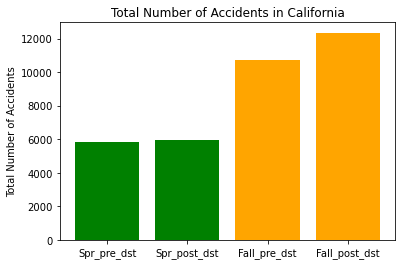

In [17]:
# First we considered the total number of accident for four conditions and plot a bar graph. 
colors = ['g', 'g', 'orange', 'orange']
plt.bar(ca_groupby_df.index, ca_groupby_df['ID'], color = colors)
xticks = ['Spr_pre_dst', 'Spr_post_dst', 'Fall_pre_dst', 'Fall_post_dst']
plt.xticks(np.arange(4), xticks)
plt.ylabel('Total Number of Accidents')
plt.title('Total Number of Accidents in California')


First, looking at total accidents in California for the fall DST change:

In [18]:
# Only compare the Fall accident number using chi-squre test: 
observed_fall = [10723, 12340]
expected_fall = 11531.5
chi_df_fall = pd.DataFrame([observed_fall]).T
chi_df_fall[1] = expected_fall
chi_df_fall.columns = ["observed_fall", "expected_fall"]
chi_df_fall

critical_value_fall = stats.chi2.ppf(q = 0.95, df = 1)
critical_value_fall

3.841458820694124

In [19]:
stats.chisquare(chi_df_fall['observed_fall'], chi_df_fall['expected_fall'])

# Since the chi square value of 113.37 exceeds the critical value of 3.841, we conclude that the results are statistically significant.

Power_divergenceResult(statistic=113.37159085981875, pvalue=1.788998918858161e-26)

Chi-squre test results for total accidents in California for the fall DST change (comparing before and after the DST change):

This low critical value along with a high statistic value many times greater, shows this test is statistically significant. With an extremely small pvalue, we see that these two data sets are very different. 

Second, looking at total accidents in California for the spring DST change:

In [20]:
# Only compare the Spring accident number using chi-squre test: 
observed_spring = [5849, 5960]
expected_spring = 5904.5
chi_df_spring = pd.DataFrame([observed_spring]).T
chi_df_spring[1] = expected_spring
chi_df_spring.columns = ["observed_spring", "expected_spring"]
chi_df_spring

critical_value_spring = stats.chi2.ppf(q = 0.95, df = 1)
critical_value_spring

3.841458820694124

In [21]:
stats.chisquare(chi_df_spring['observed_spring'], chi_df_spring['expected_spring'])

# Since the chi square value of 1.0433 smaller than the critical value of 3.841, we conclude that the results are not statistically significant.

Power_divergenceResult(statistic=1.0433567617918538, pvalue=0.3070420610233171)

Chi-squre test results for total accidents in California for the spring DST change (comparing before and after the DST change):

This low critical value along with a low statistic value, smaller than the critical value, shows this test is not statistically significant. With a realatively large pvalue, we see that these two data sets are more similar than different, somewhat overlapping. 

# Compare Severity

We found that in this data set, the severity of each accident is shown. The severity is based on a scale of 1 to 4, where 1 indicates the least impact on traffic and 4 indicates a significant impact on traffic. We took at this data column to see if there is a significant difference in accident severity in our 4 time frames.

In [56]:
# Counts of each severity by 1-4 scale
merge_ca_df['Severity'].value_counts()

2    34023
3      557
4      292
Name: Severity, dtype: int64

In [57]:
# Grouping the severity by the DST_Flag status.

group0 = merge_ca_df[merge_ca_df["DST_Flag"] == 'DST_off_POST' ]["Severity"]
group1 = merge_ca_df[merge_ca_df["DST_Flag"] == 'DST_off_PRE' ]["Severity"]
group2 = merge_ca_df[merge_ca_df["DST_Flag"] == 'DST_on_POST' ]["Severity"]
group3 = merge_ca_df[merge_ca_df["DST_Flag"] == 'DST_on_PRE' ]["Severity"]

Statistical analysis of severity in spring for California:
This showed no significant diffrence. (see pvalue)

In [58]:
# T test between DST on pre and DST on post, spring, compare the severity.

stats.ttest_ind(group3, group2, equal_var=False)

Ttest_indResult(statistic=1.5349062703168423, pvalue=0.12483377481522151)

Statistical analysis of severity in fall for California:
This showed no significant diffrence. (see pvalue)

In [59]:
# T test between DST off pre and DST off post, fall, compare the severity.

stats.ttest_ind(group0, group1, equal_var=False)

Ttest_indResult(statistic=-1.3521466694263538, pvalue=0.1763420859618193)

We then looked at graphs of the number of different severity accidents in California. We also did some statical analysis on this specific data. We chose to look at severity of 2 and 4. This is because majority of the fdata falls within severity 2, and severity 4 is the most fatal accidents. We wanted to look at if there is a significant difference in the number of bad accidents from before to after a time change.  

In [110]:
group0_sev2 = merge_ca_df[(merge_ca_df["DST_Flag"] == 'DST_off_POST') & (merge_ca_df["Severity"] == 2)]["Severity"]
group1_sev2 = merge_ca_df[(merge_ca_df["DST_Flag"] == 'DST_off_PRE') & (merge_ca_df["Severity"] == 2)]["Severity"]
group2_sev2 = merge_ca_df[(merge_ca_df["DST_Flag"] == 'DST_on_POST') & (merge_ca_df["Severity"] == 2)]["Severity"]
group3_sev2 = merge_ca_df[(merge_ca_df["DST_Flag"] == 'DST_on_PRE') & (merge_ca_df["Severity"] == 2)]["Severity"]

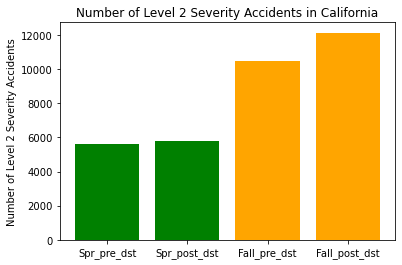

In [86]:
# count how many severe accidents across four groups, we consider the lowest level of severity reported = 2.
sev_count_2 = merge_ca_df[merge_ca_df['Severity'] == 2]['DST_Flag'].value_counts()
sev_count_2 = sev_count_2.reindex(new_order)
colors = ['g', 'g', 'orange', 'orange']
plt.xticks(np.arange(4), xticks)
plt.bar(sev_count_2.index, sev_count_2, color = colors)
plt.ylabel('Number of Level 2 Severity Accidents')
plt.title('Number of Level 2 Severity Accidents in California')

In [129]:
fall_pre_ca_sev_2_count = len(group1_sev2)
fall_post_ca_sev_2_count = len(group0_sev2)
spring_pre_ca_sev_2_count = len(group3_sev2)
spring_post_ca_sev_2_count = len(group2_sev2)

In [130]:
# Null Hypothesis: There is no difference in the number of severe (severity = 2) accidents 10 days before daylight savings 
#  time change and 10 days after daylight savings time change.   
# Alternate Hypothesis: There is a significant increase in the number of severe (severity = 2) accidents 10 days after 
#  a change in daylight savings time versus 10 days before the change.
# we ran a chi-square test:
expected_spring = (spring_pre_ca_sev_2_count + spring_post_ca_sev_2_count) /2
spring_ca_sev2=[spring_pre_ca_sev_2_count,spring_post_ca_sev_2_count]
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value

3.841458820694124

In [131]:
#spring
stats.chisquare(spring_ca_sev2,expected_spring)

Power_divergenceResult(statistic=1.9750702247191012, pvalue=0.15991071309129923)

Chi-squre test results for level 2 severity accidents in California for the spring DST change (comparing before and after the DST change):

This low critical value along with a low statistic value, shows this test is not statistically significant. With a smaller pvalue, we see that these two data sets are not too similar. 

In [117]:
#Fall
expected_fall = (fall_pre_ca_sev_2_count + fall_post_ca_sev_2_count) /2
fall_ca_sev2=[fall_pre_ca_sev_2_count,fall_post_ca_sev_2_count]
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value


3.841458820694124

In [118]:
#Fall
stats.chisquare(fall_ca_sev2,expected_fall)

Power_divergenceResult(statistic=117.2569042463877, pvalue=2.5219104249887673e-27)

Chi-squre test results for level 2 severity accidents in California for the spring DST change (comparing before and after the DST change):

This low critical value along with a very high statistic value, shows this test is statistically significant. With an extremely small pvalue, we see that these two data sets are not similar, they would not have much overlap. 

Text(0.5, 1.0, 'Number of Level 4 Severity Accidents in California')

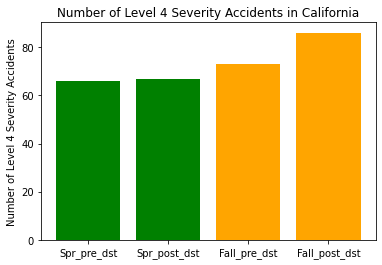

In [134]:
# count how many severe accidents across four groups, we consider the highest level of severity reported = 4. 
sev_count = merge_ca_df[merge_ca_df['Severity'] == 4]['DST_Flag'].value_counts()
sev_count = sev_count.reindex(new_order)
plt.xticks(np.arange(4), xticks)
colors = ['g', 'g', 'orange', 'orange']
plt.bar(sev_count.index, sev_count, color = colors)
plt.ylabel('Number of Level 4 Severity Accidents')
plt.title('Number of Level 4 Severity Accidents in California')

In [119]:
group0_sev4 = merge_ca_df[(merge_ca_df["DST_Flag"] == 'DST_off_POST') & (merge_ca_df["Severity"] == 4)]["Severity"]
group1_sev4 = merge_ca_df[(merge_ca_df["DST_Flag"] == 'DST_off_PRE') & (merge_ca_df["Severity"] == 4)]["Severity"]
group2_sev4 = merge_ca_df[(merge_ca_df["DST_Flag"] == 'DST_on_POST') & (merge_ca_df["Severity"] == 4)]["Severity"]
group3_sev4 = merge_ca_df[(merge_ca_df["DST_Flag"] == 'DST_on_PRE') & (merge_ca_df["Severity"] == 4)]["Severity"]

In [132]:
fall_pre_ca_sev_4_count = len(group1_sev4)
fall_post_ca_sev_4_count = len(group0_sev4)
spring_pre_ca_sev_4_count = len(group3_sev4)
spring_post_ca_sev_4_count = len(group2_sev4)

In [133]:
#spring sev 4
expected_spring = (spring_pre_ca_sev_4_count + spring_post_ca_sev_4_count) /2
spring_ca_sev4=[spring_pre_ca_sev_4_count,spring_post_ca_sev_4_count]
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value

3.841458820694124

In [126]:
#spring sev 4
stats.chisquare(spring_ca_sev4,expected_spring)

Power_divergenceResult(statistic=0.007518796992481203, pvalue=0.9309012350403777)

Chi-squre test results for level 4 severity accidents in California for the spring DST change (comparing before and after the DST change):

This low critical value along with a very low statistic value many times smaller, shows this test is not statistically significant. With a large pvalue, we see that these two data sets are very similar. 

In [127]:
#Fall
expected_fall = (fall_pre_ca_sev_4_count + fall_post_ca_sev_4_count) /2
fall_ca_sev4=[fall_pre_ca_sev_4_count,fall_post_ca_sev_4_count]
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value

3.841458820694124

In [128]:
#Fall
stats.chisquare(fall_ca_sev4,expected_fall)

Power_divergenceResult(statistic=1.0628930817610063, pvalue=0.30255626640567823)

Chi-squre test results for level 4 severity accidents in California for the fall DST change (comparing before and after the DST change):

This low critical value along with a low statistic value, shows this test is not statistically significant. With an average pvalue, we see that these two data sets might have some overlap. 

# AZ as Control

In order to have a baseline control, we looked at Arizona data. Arizona as a state does not observe daylight savings time and has realatively similar weather to California. 

Text(0.5, 1.0, 'Total Number of Accidents in Arizona')

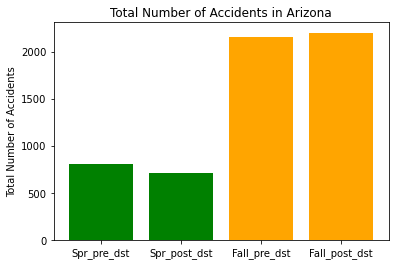

In [26]:
az_groupby_df = merge_az_df.groupby('DST_Flag').count()

new_order = ['DST_on_PRE', 'DST_on_POST','DST_off_PRE','DST_off_POST']
az_groupby_df = az_groupby_df.reindex(new_order)
az_groupby_df

colors = ['g', 'g', 'orange', 'orange']
plt.bar(az_groupby_df.index, az_groupby_df['ID'], color = colors)
xticks = ['Spr_pre_dst', 'Spr_post_dst', 'Fall_pre_dst', 'Fall_post_dst']
plt.xticks(np.arange(4), xticks)
plt.ylabel('Total Number of Accidents')
plt.title('Total Number of Accidents in Arizona')

In [27]:
az_groupby_df

,Unnamed: 0,ID,Severity,Start_Time,Start_Lat,Start_Lng,Description,City,County,State,...,No_Exit,Station,Stop,Traffic_Signal,Sunrise_Sunset,date,time,year,month,day
DST_Flag,,,,,,,,,,,,,,,,,,,,,
DST_on_PRE,805,805,805,805,805,805,805,805,805,805,...,805,805,805,805,804,805,805,805,805,805
DST_on_POST,713,713,713,713,713,713,713,713,713,713,...,713,713,713,713,713,713,713,713,713,713
DST_off_PRE,2157,2157,2157,2157,2157,2157,2157,2157,2157,2157,...,2157,2157,2157,2157,2153,2157,2157,2157,2157,2157
DST_off_POST,2199,2199,2199,2199,2199,2199,2199,2199,2199,2199,...,2199,2199,2199,2199,2198,2199,2199,2199,2199,2199


In [28]:
# Only compare the Fall accident in AZ number using chi-squre test: 
observed_fall_az = [2157, 2199]
expected_fall_az = (2157+2199)/2
chi_df_fall_az = pd.DataFrame([observed_fall_az]).T
chi_df_fall_az[1] = expected_fall_az
chi_df_fall_az.columns = ["observed_fall_az", "expected_fall_az"]
chi_df_fall_az

critical_value_fall_az = stats.chi2.ppf(q = 0.95, df = 1)
critical_value_fall_az

3.841458820694124

In [29]:
stats.chisquare(chi_df_fall_az['observed_fall_az'], chi_df_fall_az['expected_fall_az'])

Power_divergenceResult(statistic=0.4049586776859504, pvalue=0.5245394364353129)

Chi-squre test results for total accidents in Arizona for the fall DST change (comparing before and after the DST change):

This low critical value along with a low statistic value many times smaller, shows this test is not statistically significant. With a higher pvalue, we see that these two data sets may have some overlap. 

In [30]:
# Only compare the spring accident in AZ number using chi-squre test: 
observed_spring_az = [805, 713]
expected_spring_az = (805+713)/2
chi_df_spring_az = pd.DataFrame([observed_spring_az]).T
chi_df_spring_az[1] = expected_spring_az
chi_df_spring_az.columns = ["observed_spring_az", "expected_spring_az"]
chi_df_spring_az

critical_value_fall_az = stats.chi2.ppf(q = 0.95, df = 1)
critical_value_fall_az

3.841458820694124

In [31]:
stats.chisquare(chi_df_spring_az['observed_spring_az'], chi_df_spring_az['expected_spring_az'])

Power_divergenceResult(statistic=5.575757575757576, pvalue=0.018210785121766562)

Chi-squre test results for total accidents in Arizona for the sping DST change (comparing before and after the DST change):

This low critical value along with a high statistic value, shows this test is statistically significant. With a low pvalue, we see that these two data sets are going to have little overlap and be more unique. 

# Summary

In [32]:
az_groupby_df['ID']

DST_Flag
DST_on_PRE       805
DST_on_POST      713
DST_off_PRE     2157
DST_off_POST    2199
Name: ID, dtype: int64

In [33]:
ca_groupby_df['ID']

DST_Flag
DST_on_PRE       5849
DST_on_POST      5960
DST_off_PRE     10723
DST_off_POST    12340
Name: ID, dtype: int64

In [46]:
summary_df = pd.DataFrame({
    '# of Accident CA' : ca_groupby_df['ID'],
    '# of Accident AZ' : az_groupby_df['ID']
})
summary_df

,# of Accident CA,# of Accident AZ
DST_Flag,,
DST_on_PRE,5849,805
DST_on_POST,5960,713
DST_off_PRE,10723,2157
DST_off_POST,12340,2199


We looked at the the percent changes from before to after the DST switch for CA and AZ in both the spring and fall. 

In [35]:
percent_change_ca_on = ((5960 - 5849)/5849) * 100
percent_change_ca_off = ((12340 - 10723)/10723) * 100
percent_change_az_on = ((713 - 805)/805) * 100
percent_change_az_off = ((2199 - 2157)/2157) * 100

print(f'Percent change in CA in Spring: {round(percent_change_ca_on,2)}%')
print(f'Percent change in CA in Fall: {round(percent_change_ca_off,2)}%')
print(f'Percent change in AZ in Spring: {round(percent_change_az_on,2)}%')
print(f'Percent change in AZ in Fall: {round(percent_change_az_off,2)}%')

Percent change in CA in Spring: 1.9%
Percent change in CA in Fall: 15.08%
Percent change in AZ in Spring: -11.43%
Percent change in AZ in Fall: 1.95%


Then, we compared spring accident rate to fall accident rate, overall.

In [141]:
percent_change_ca_avgspring_to_avgfall = ((((10723+12340)/2)-((5849+5960)/2)))/((5849+5960)/2)*100
percent_change_az_avgspring_to_avgfall = ((((2157+2199)/2)-((805+713)/2)))/((805+713)/2)*100

print(f'Percent change in CA from Spring to Fall: {round(percent_change_ca_avgspring_to_avgfall,2)}%')
print(f'Percent change in AZ from Spring to Fall: {round(percent_change_az_avgspring_to_avgfall,2)}%')

Percent change in CA from Spring to Fall: 95.3%
Percent change in AZ from Spring to Fall: 186.96%


Final observations:

Our alternate hypothesis was proved in the measures of overall accident frequency, non-severe accident frequency, and severe accident frequency, but this was proved only in the Fall "DST off" event and not in the Spring "DST on" event. 

Useful public warning information regarding Fall Daylight Savings time change is: "In the 10 days after the November time change each year, the chances of being in an accident, whether severe or not, are increased by 15% from the prior 10 days"